In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
from zipfile import ZipFile
file="C:\\Users\\HP\\OneDrive\\Desktop\\Jupyter\\Bharat Internship\\archive.zip"
with ZipFile(file,'r')as zip_ref:
    zip_ref.extractall()
    print("process completed")

process completed


In [8]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
print("Unique number of species in iris dataset is : ",df["species"].nunique())

Unique number of species in iris dataset is :  3


In [14]:
print("Unique species in iris dataset are : ",df["species"].unique())

Unique species in iris dataset are :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='species', ylabel='count'>

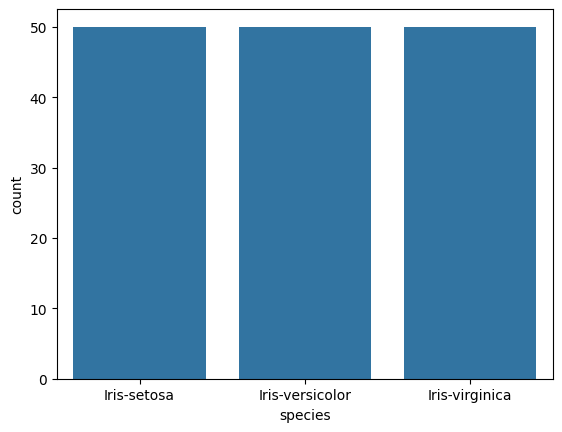

In [16]:
#data visualization
sns.countplot(x=df["species"])

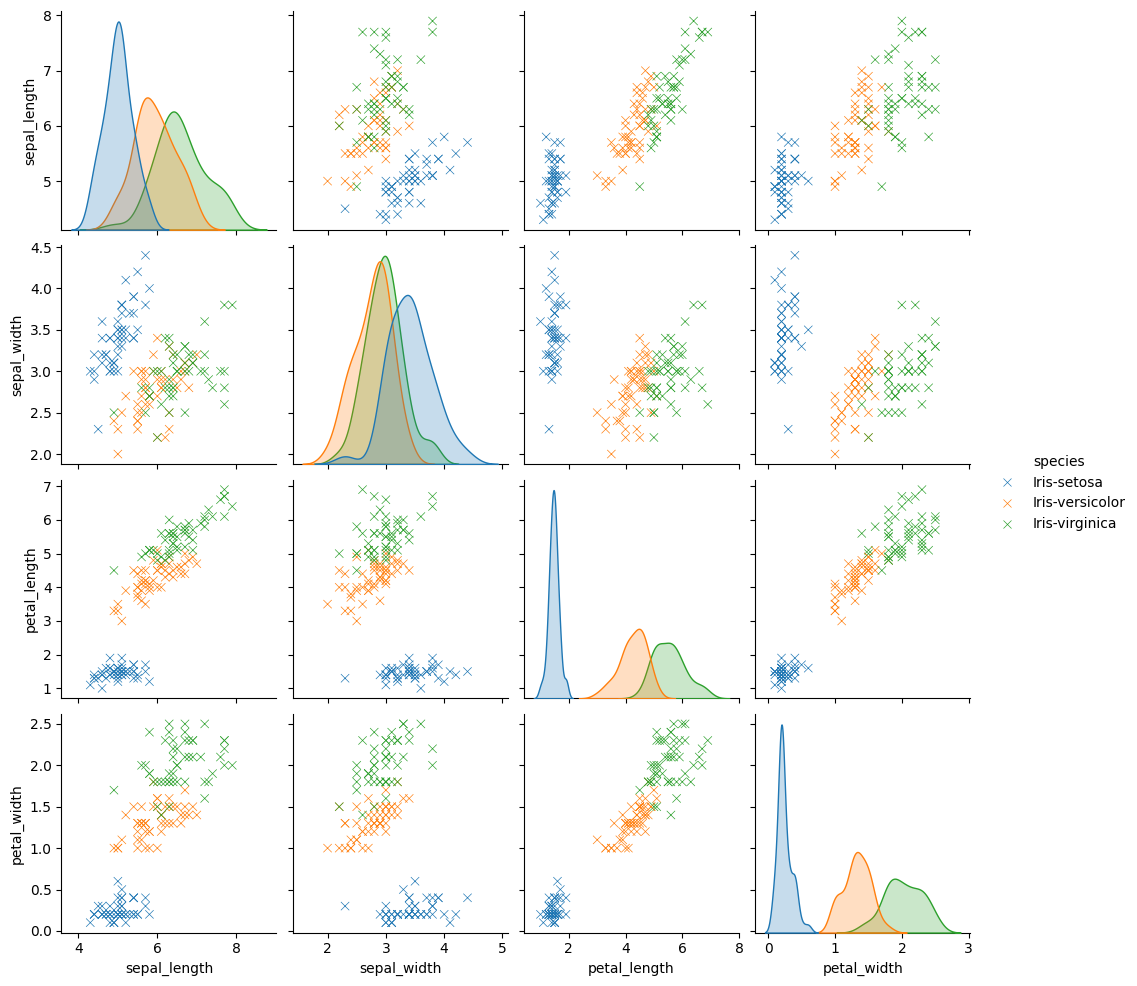

In [17]:
sns.pairplot(df,hue='species',markers='x')
plt.show()

<Axes: >

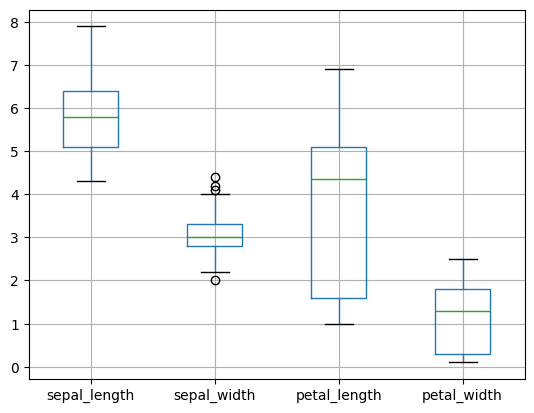

In [18]:
df.boxplot()

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

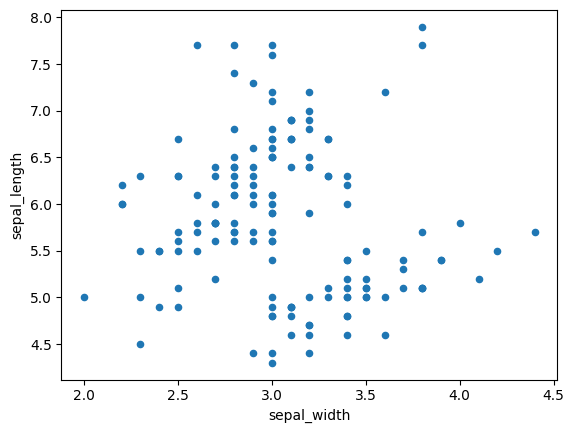

In [19]:
df.plot(x = 'sepal_width',y = 'sepal_length', kind = 'scatter')

<Axes: xlabel='petal_length', ylabel='petal_width'>

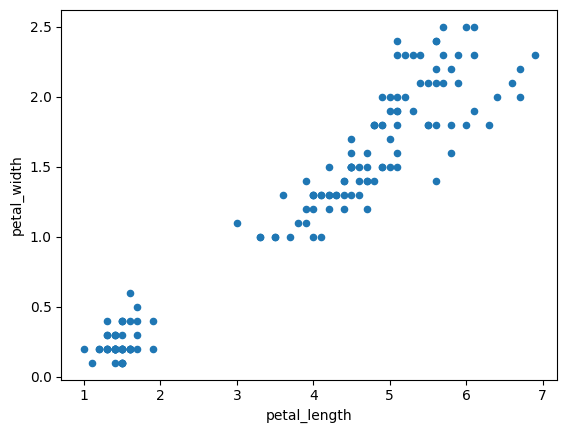

In [20]:
df.plot(x = 'petal_length',y = 'petal_width', kind = 'scatter')

<Axes: >

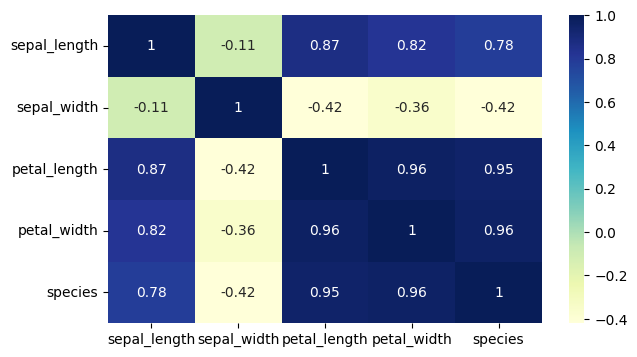

In [21]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace = True)
plt.figure(figsize = (7,4))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [22]:
#splitting dataset
x=df.drop("species",axis=1)
y=df["species"]

In [30]:
#training model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)
print('Shape of x_train is : ', x_train.shape)
print('Shape of x_test is : ',  x_test.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of y_test is : ',  y_test.shape)

Shape of x_train is :  (105, 4)
Shape of x_test is :  (45, 4)
Shape of y_train is :  (105,)
Shape of y_test is :  (45,)


In [32]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred=model.predict(x_test)
y_pred

array([0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1], dtype=int64)

In [33]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

In [34]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [35]:
# Traing Data Evaluation
y_pred_train=model.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print(cnf_matrix)
print()
print()
acc_score=accuracy_score(y_train,y_pred_train)
print('Accuracy Score is : ',acc_score)
print()
clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]


Accuracy Score is :  0.9809523809523809

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [36]:
# Testing Data Evaluation
y_pred=model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print()
print()
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy Score is : ',acc_score)
print()
clf_report=classification_report(y_test,y_pred)
print(clf_report)

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


Accuracy Score is :  0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [37]:
def get_predicted_class(x1,x2,x3,x4):
    predicted_class=model.predict([[x1,x2,x3,x4]])
    return predicted_class
sepal_length=int(input('Enter the value of SepalLengthCm : '))
sepal_width=int(input('Enter the value of SepalWidthCm : '))
petal_length=int(input('Enter the value of PetalLengthCm : '))
petal_width=int(input('Enter the value of PetalWidthCm : '))

get_predicted_class(sepal_length,sepal_width,petal_length,petal_width)
model.score(x,y)

Enter the value of SepalLengthCm :  2
Enter the value of SepalWidthCm :  1
Enter the value of PetalLengthCm :  5
Enter the value of PetalWidthCm :  4


0.9666666666666667

In [38]:
acc_score

0.9333333333333333